In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\ExcelR\Data Science\Assignments\Multi Linear Regression\ToyotaCorolla.csv", encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df1 = df.drop(columns={'Id','Model','Age_08_04','cc','Weight','Mfg_Month','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'})
df1

,Price,Mfg_Year,KM,Fuel_Type,HP,Doors,Gears,Quarterly_Tax
0,13500,2002,46986,Diesel,90,3,5,210
1,13750,2002,72937,Diesel,90,3,5,210
2,13950,2002,41711,Diesel,90,3,5,210
3,14950,2002,48000,Diesel,90,3,5,210
4,13750,2002,38500,Diesel,90,3,5,210
...,...,...,...,...,...,...,...,...
1431,7500,1998,20544,Petrol,86,3,5,69
1432,10845,1998,19000,Petrol,86,3,5,69
1433,8500,1998,17016,Petrol,86,3,5,69
1434,7250,1998,16916,Petrol,86,3,5,69


In [6]:
df1['Petrol'] = np.where(df1['Fuel_Type']=='Petrol',1,0)

In [7]:
df1['Diesel'] = np.where(df1['Fuel_Type']=='Diesel',1,0)

In [8]:
df1['CNG'] = np.where(df1['Fuel_Type']=='CNG',1,0)

In [9]:
df1.drop(columns=['Fuel_Type'], axis=1, inplace=True)

In [10]:
df1.head()

,Price,Mfg_Year,KM,HP,Doors,Gears,Quarterly_Tax,Petrol,Diesel,CNG
0,13500,2002,46986,90,3,5,210,0,1,0
1,13750,2002,72937,90,3,5,210,0,1,0
2,13950,2002,41711,90,3,5,210,0,1,0
3,14950,2002,48000,90,3,5,210,0,1,0
4,13750,2002,38500,90,3,5,210,0,1,0


In [11]:
df1.isna().sum()

Price            0
Mfg_Year         0
KM               0
HP               0
Doors            0
Gears            0
Quarterly_Tax    0
Petrol           0
Diesel           0
CNG              0
dtype: int64

In [12]:
df1.describe()

,Price,Mfg_Year,KM,HP,Doors,Gears,Quarterly_Tax,Petrol,Diesel,CNG
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,1999.625348,68533.259749,101.502089,4.033426,5.026462,87.122563,0.880223,0.107939,0.011838
std,3626.964585,1.540722,37506.448872,14.981080,0.952677,0.188510,41.128611,0.324814,0.310411,0.108196
min,4350.000000,1998.000000,1.000000,69.000000,2.000000,3.000000,19.000000,0.000000,0.000000,0.000000
25%,8450.000000,1998.000000,43000.000000,90.000000,3.000000,5.000000,69.000000,1.000000,0.000000,0.000000
50%,9900.000000,1999.000000,63389.500000,110.000000,4.000000,5.000000,85.000000,1.000000,0.000000,0.000000
75%,11950.000000,2001.000000,87020.750000,110.000000,5.000000,5.000000,85.000000,1.000000,0.000000,0.000000
max,32500.000000,2004.000000,243000.000000,192.000000,5.000000,6.000000,283.000000,1.000000,1.000000,1.000000


In [13]:
#Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x2348e3d9d60>,
 'caps': [<matplotlib.lines.Line2D at 0x2348e3fc6a0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2348e3e4e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2348e3fcc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2348e40d220>],
 'means': [<matplotlib.lines.Line2D at 0x2348e3fcf10>]}

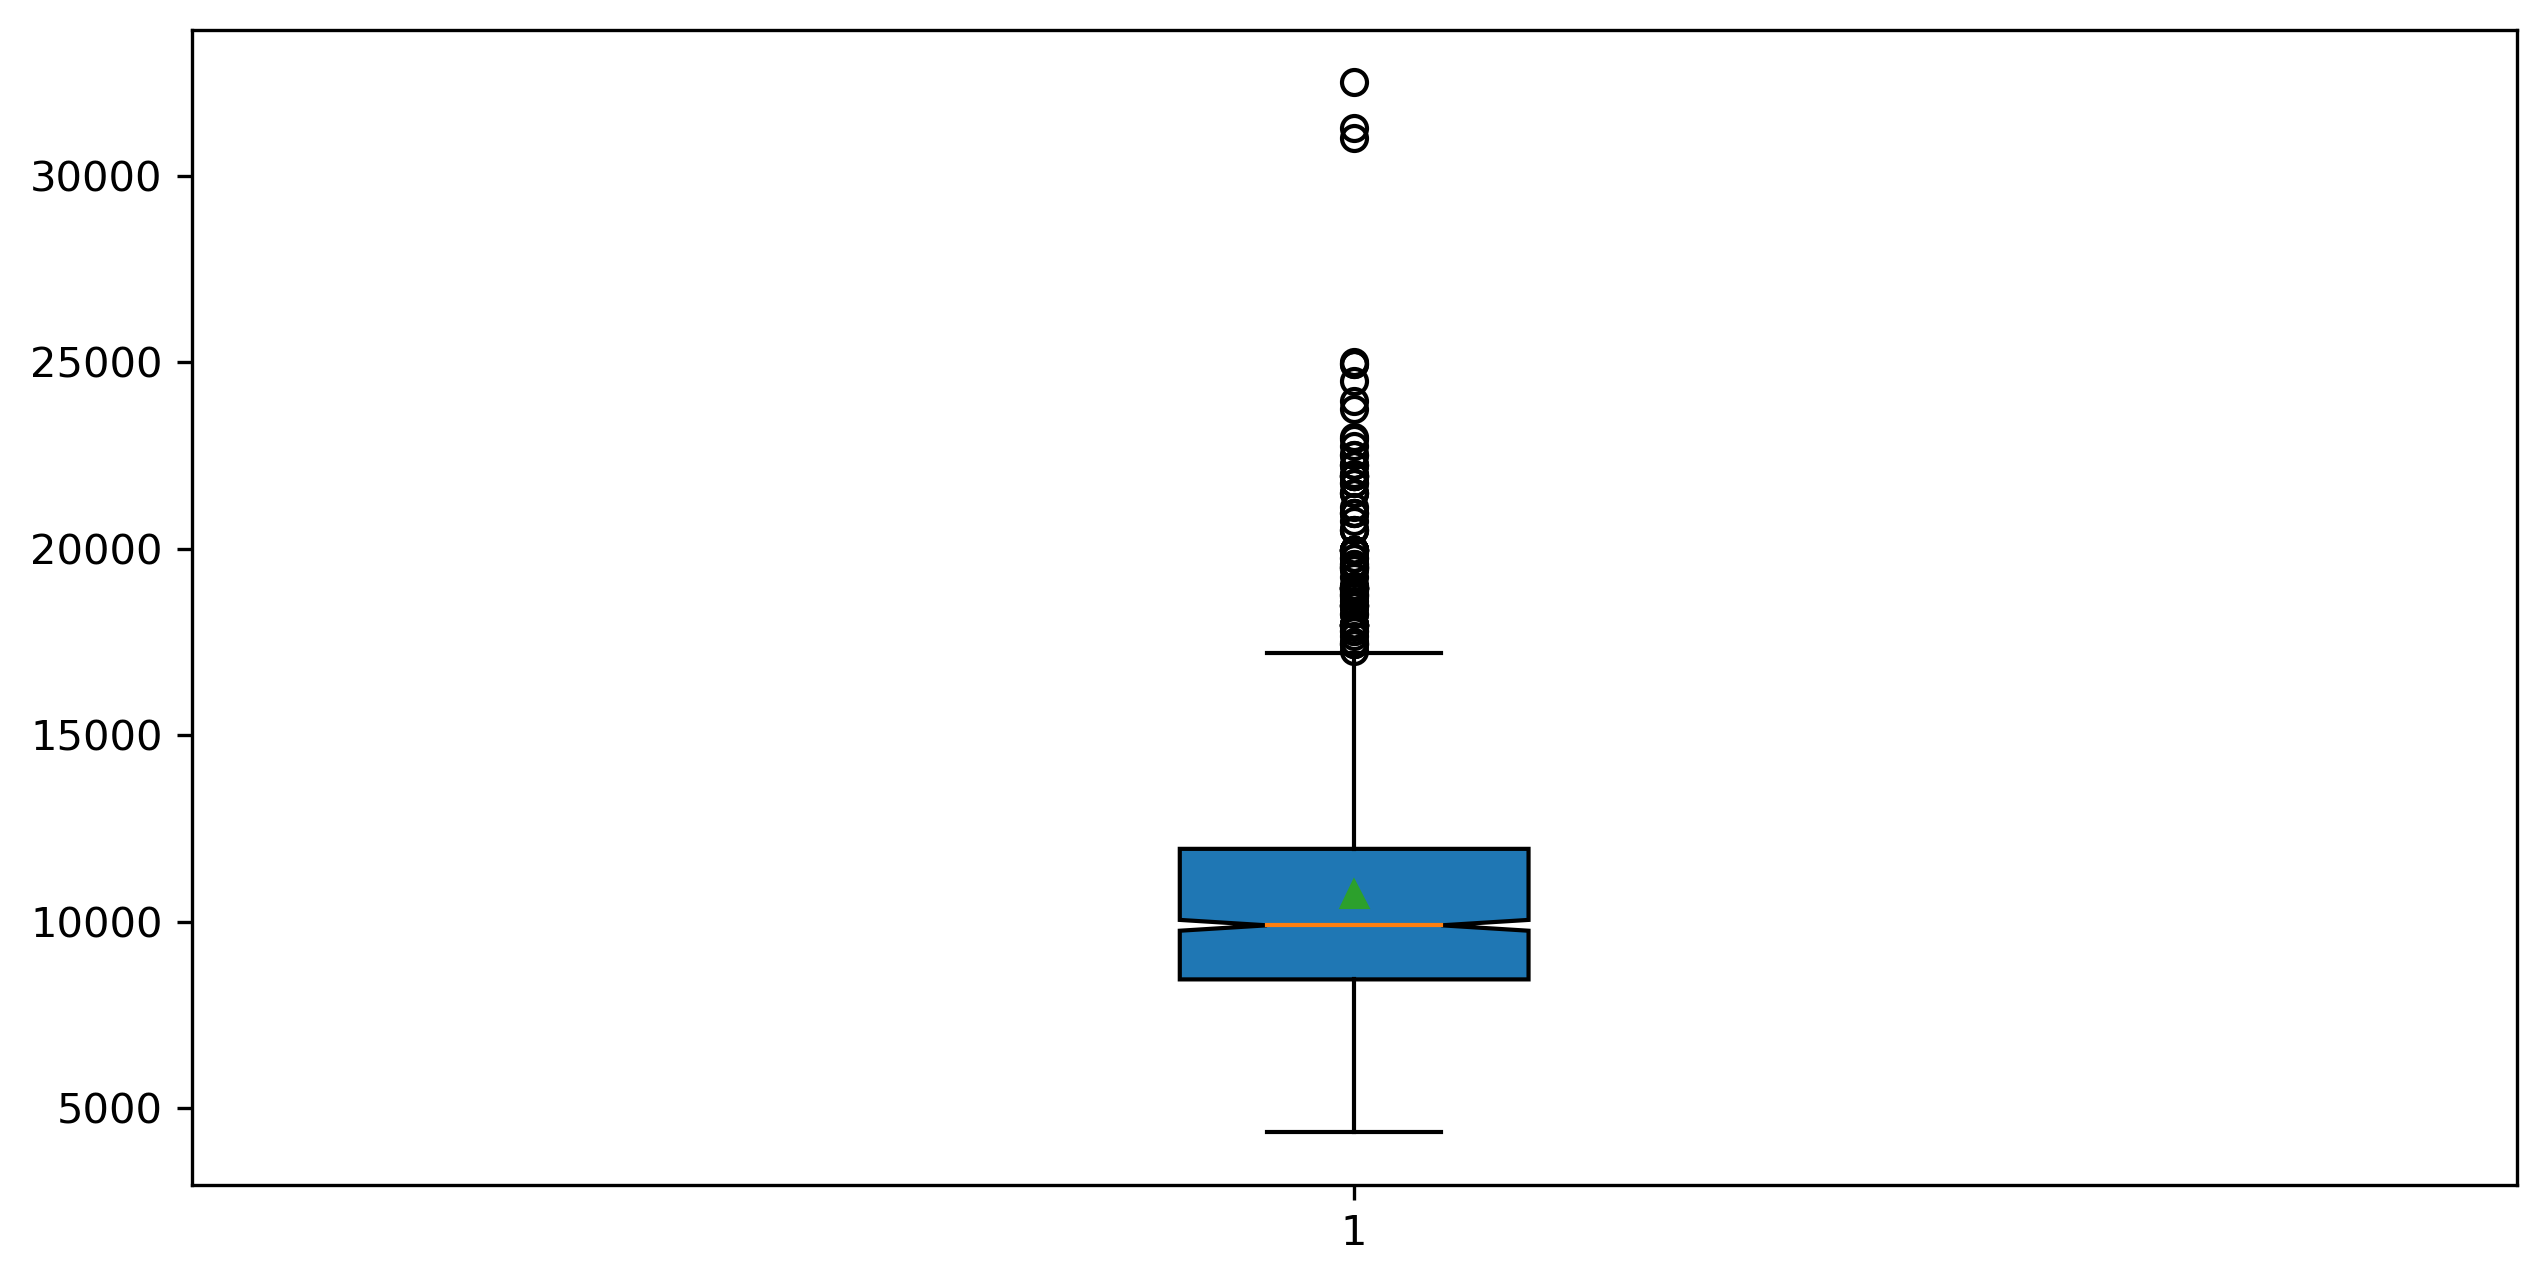

In [14]:
plt.boxplot(df1['Price'], notch=True, patch_artist=True, showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2348e472eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2348e485490>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2348e472af0>],
 'medians': [<matplotlib.lines.Line2D at 0x2348e485a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2348e491040>],
 'means': [<matplotlib.lines.Line2D at 0x2348e485d30>]}

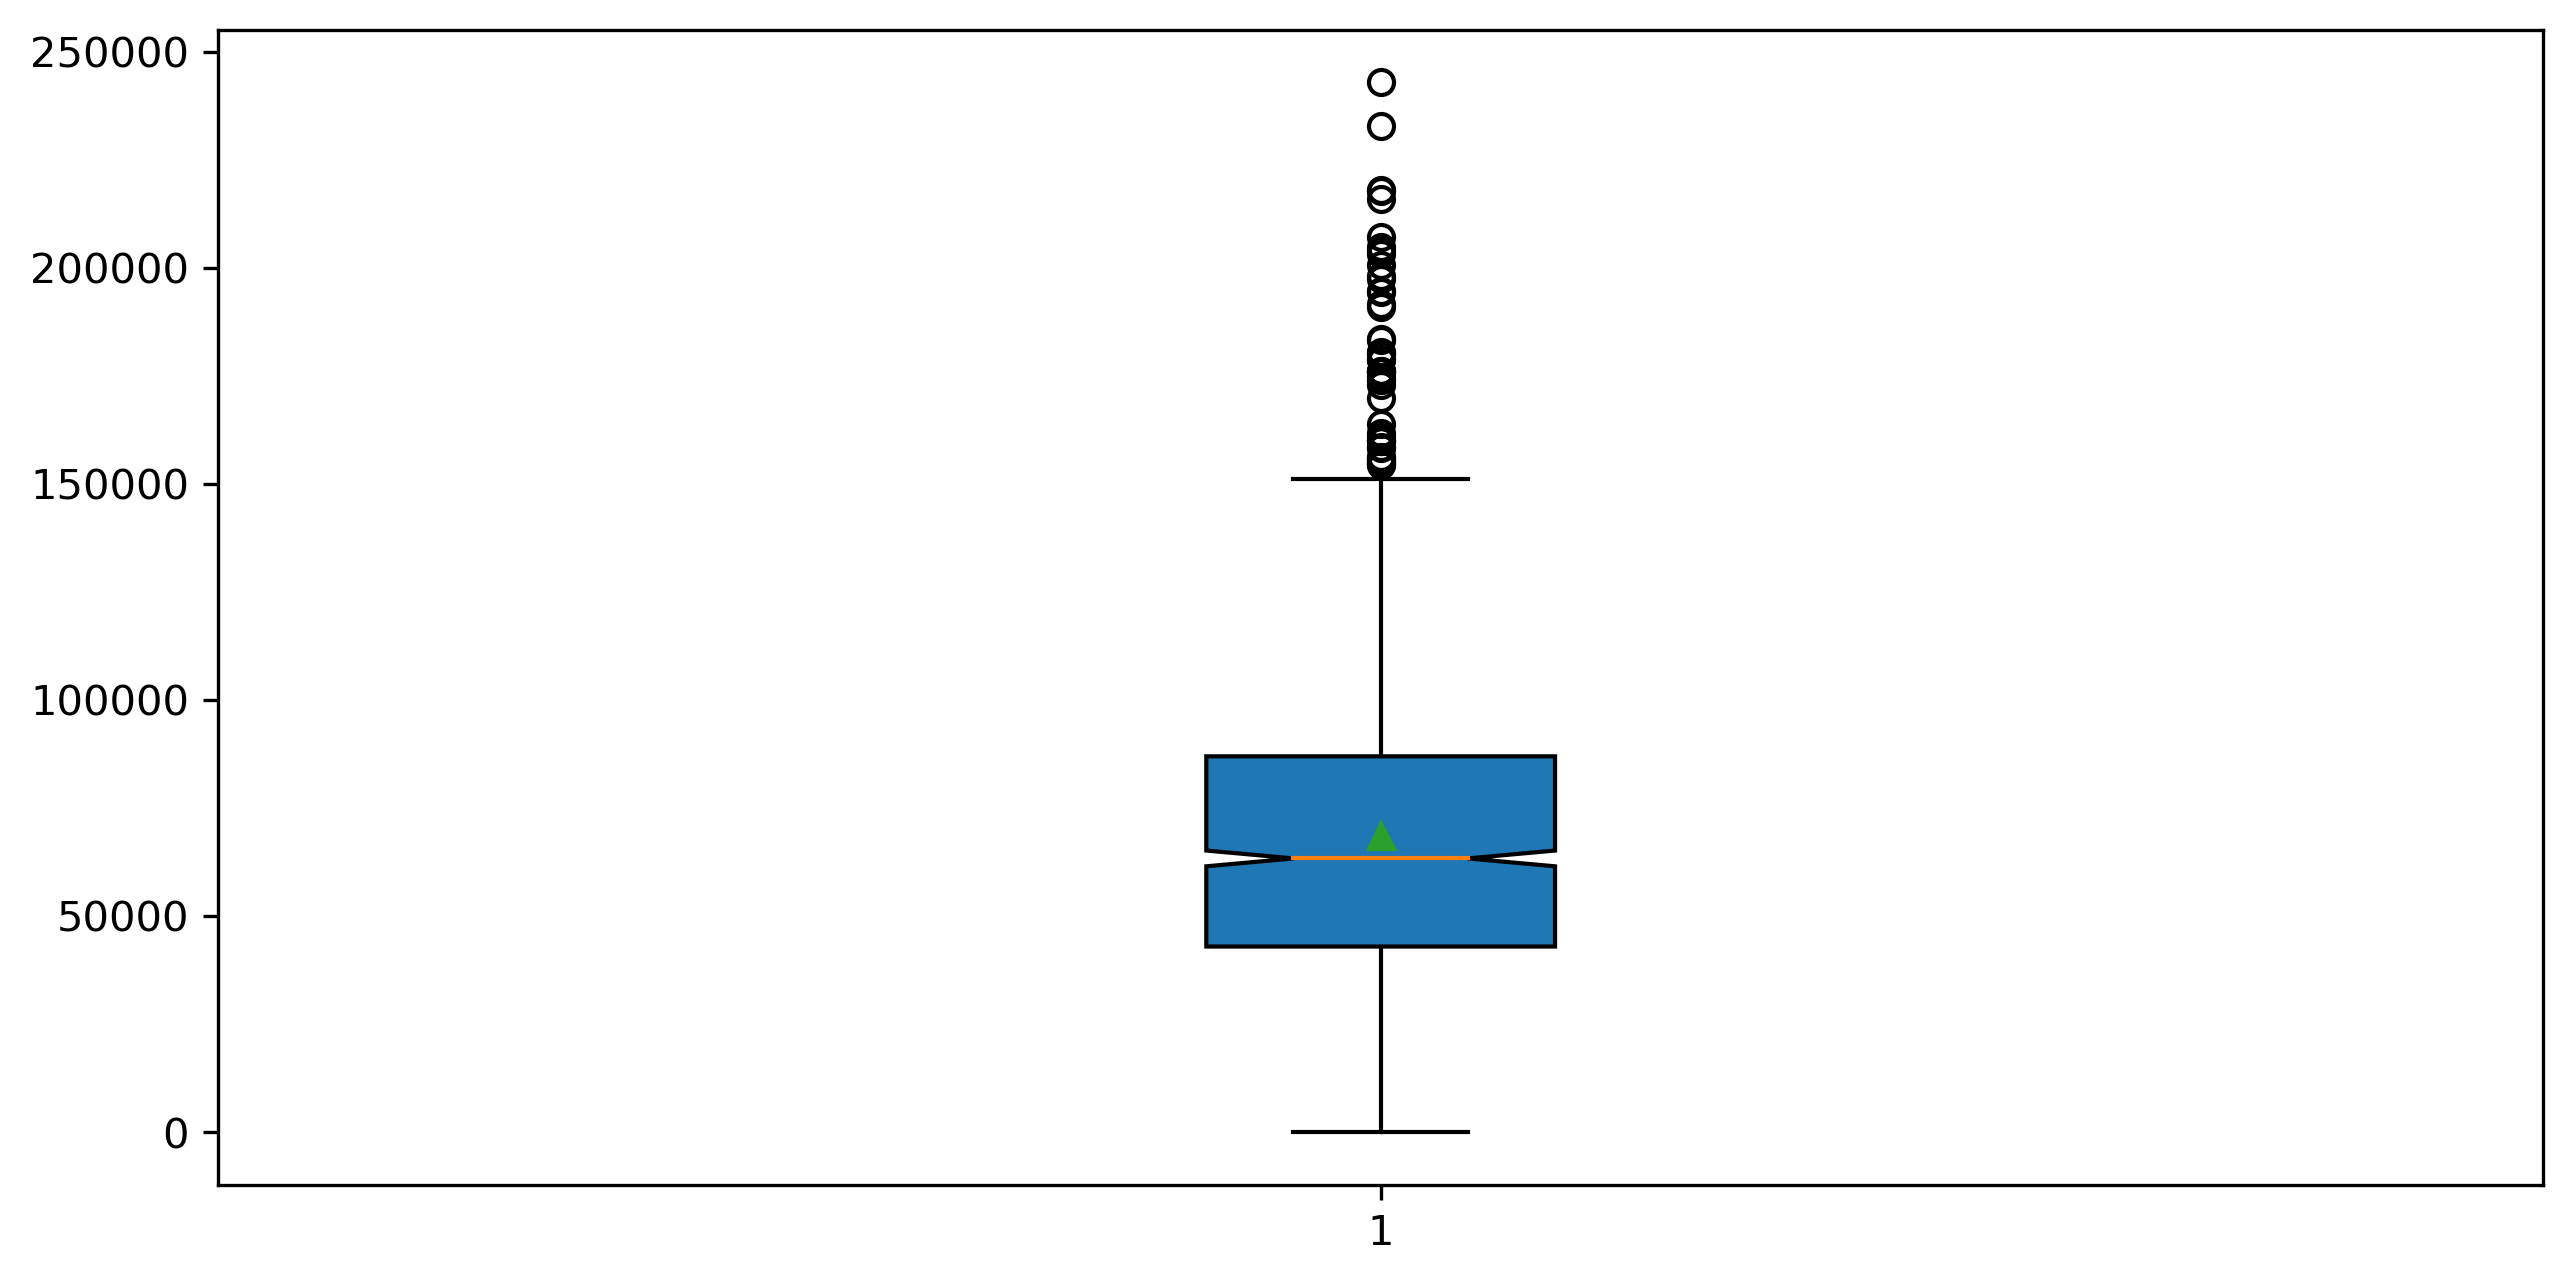

In [15]:
plt.boxplot(df1['KM'], notch=True, patch_artist=True, showmeans=True)

Text(0.5, 1.0, 'Price vs Mfg Year')

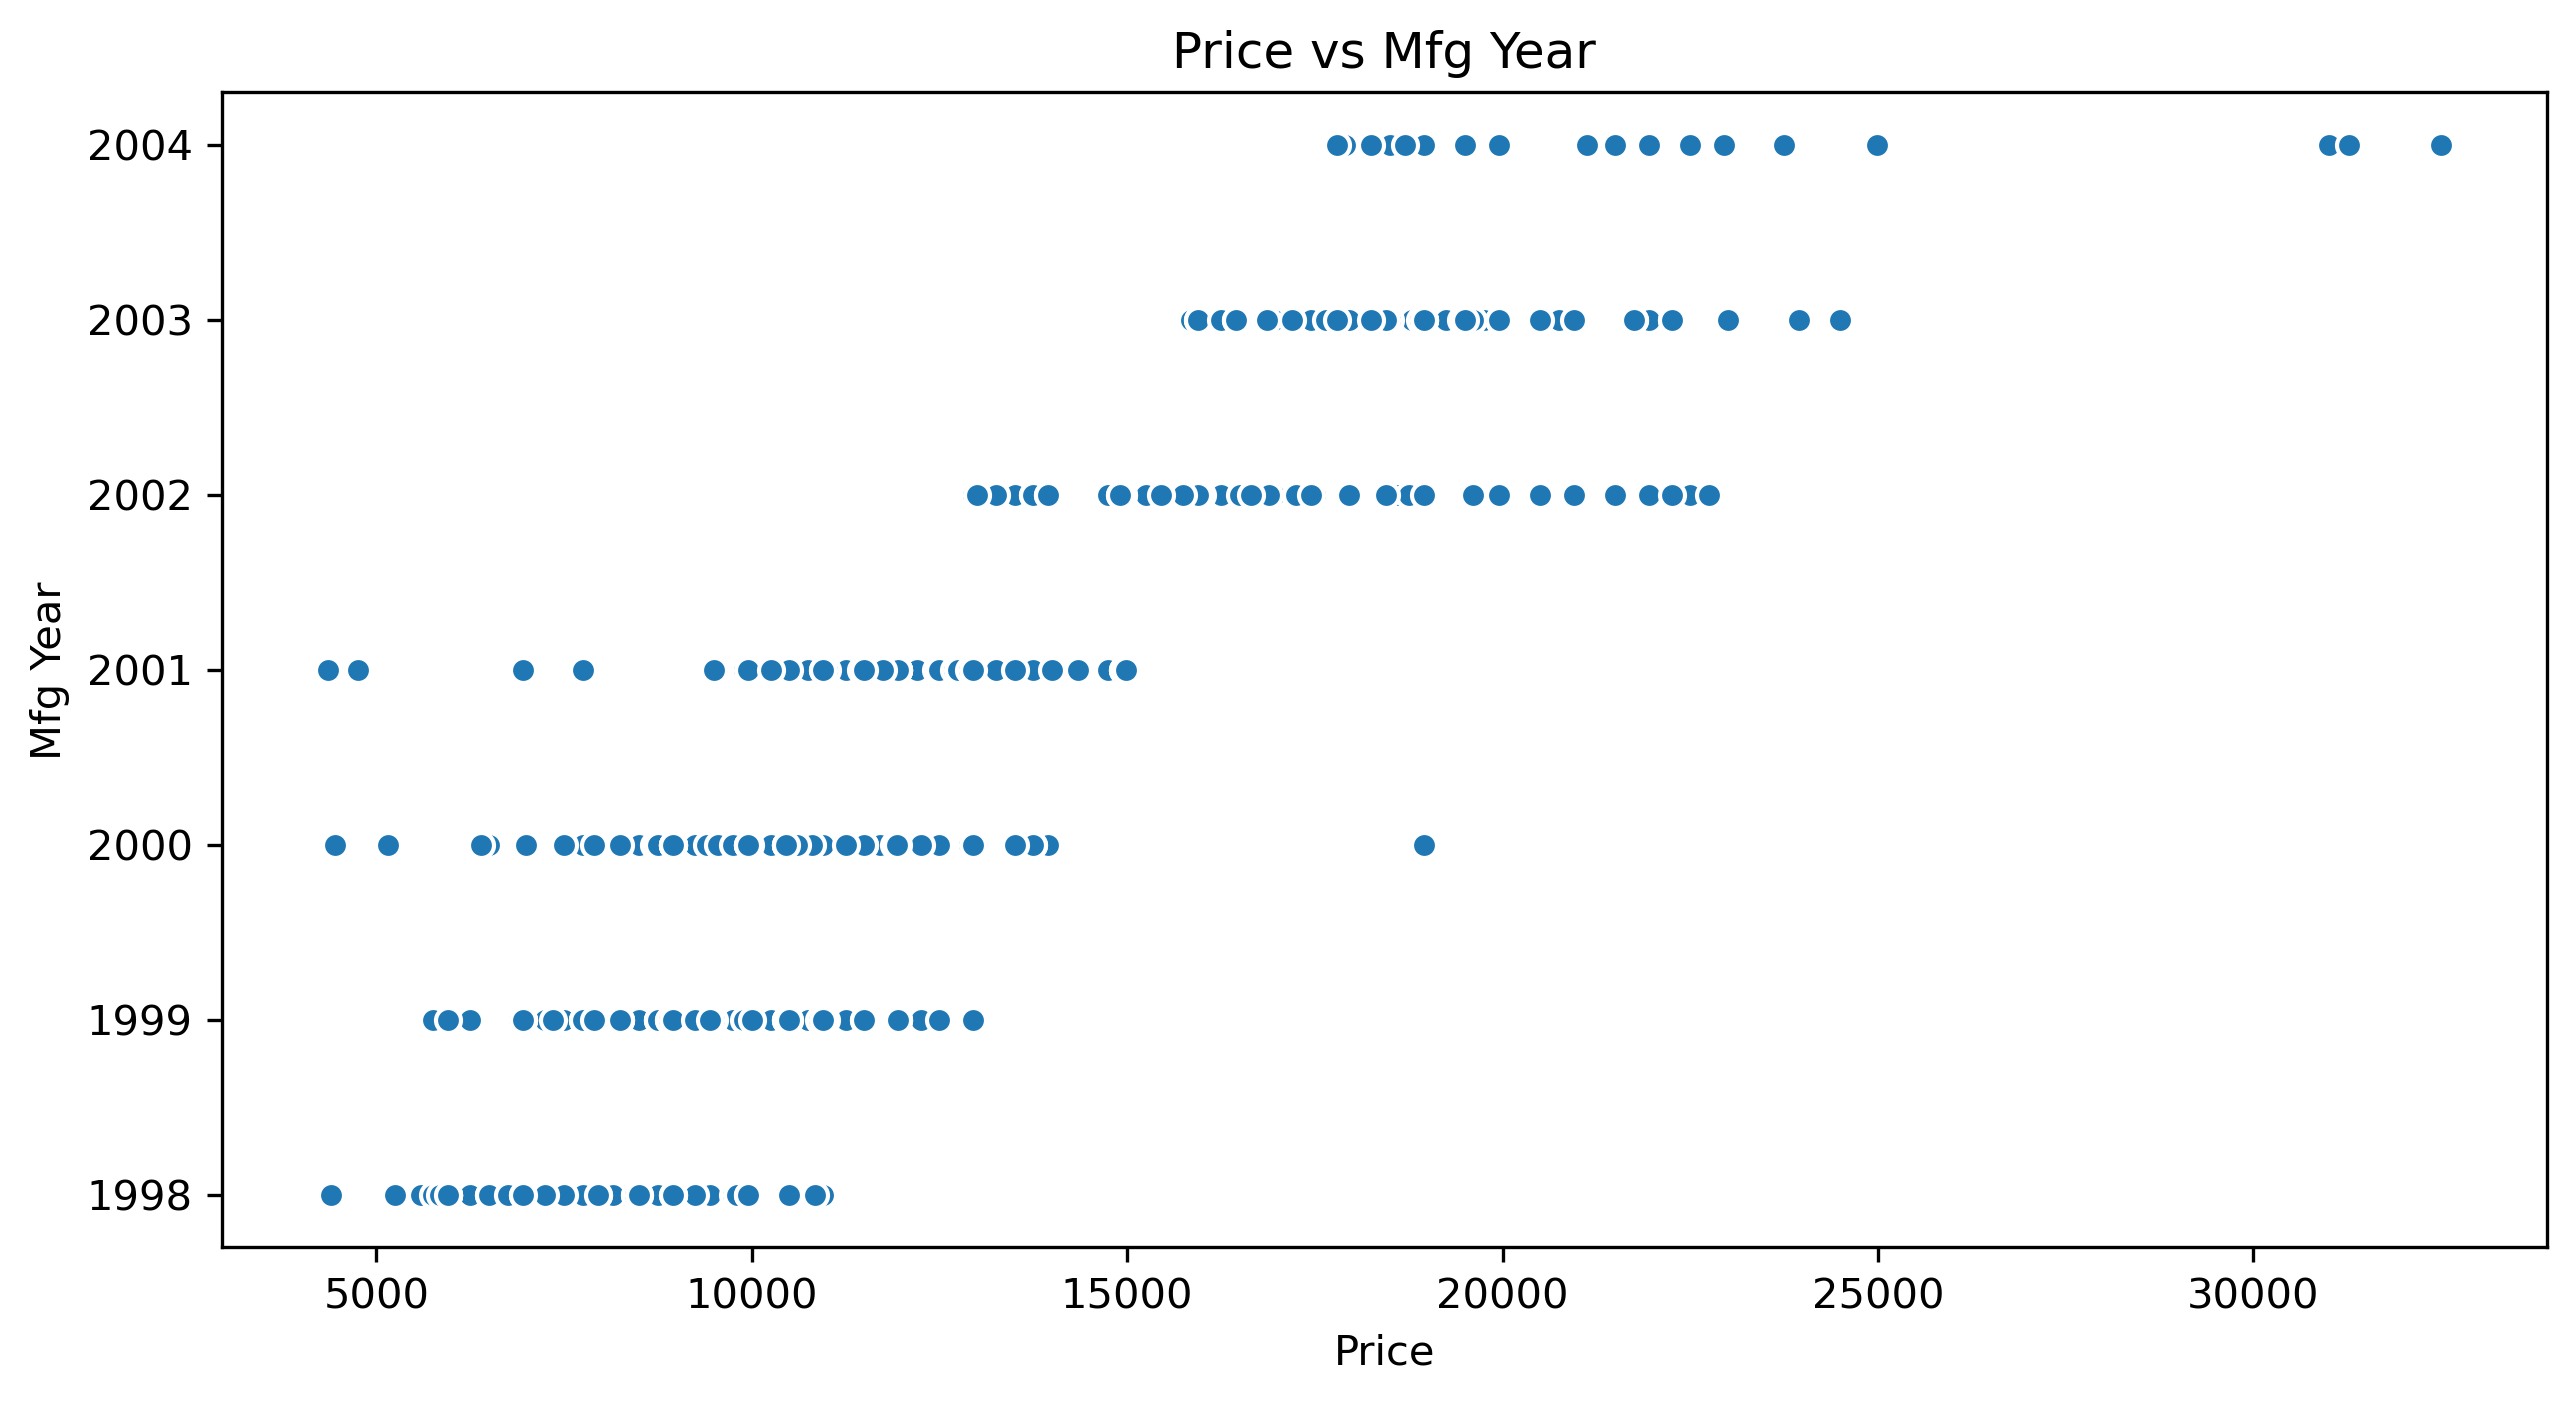

In [16]:
plt.scatter(df1['Price'],df1['Mfg_Year'], edgecolors='white')
plt.xlabel('Price')
plt.ylabel('Mfg Year')
plt.title('Price vs Mfg Year')

In [17]:
df1.corr()

,Price,Mfg_Year,KM,HP,Doors,Gears,Quarterly_Tax,Petrol,Diesel,CNG
Price,1.000000,0.885159,-0.569960,0.314990,0.185326,0.063104,0.219197,-0.038516,0.054084,-0.039536
Mfg_Year,0.885159,1.000000,-0.504974,0.164697,0.151442,0.007766,0.193934,-0.084162,0.088986,-0.002637
KM,-0.569960,-0.504974,1.000000,-0.333538,-0.036197,0.015023,0.278165,-0.433160,0.403060,0.144016
HP,0.314990,0.164697,-0.333538,1.000000,0.092424,0.209477,-0.298432,0.489110,-0.533453,0.062109
Doors,0.185326,0.151442,-0.036197,0.092424,1.000000,-0.160141,0.109363,-0.027589,0.025495,0.009680
Gears,0.063104,0.007766,0.015023,0.209477,-0.160141,1.000000,-0.005452,0.063182,-0.048847,-0.049537
Quarterly_Tax,0.219197,0.193934,0.278165,-0.298432,0.109363,-0.005452,1.000000,-0.835452,0.792726,0.233791
Petrol,-0.038516,-0.084162,-0.433160,0.489110,-0.027589,0.063182,-0.835452,1.000000,-0.942976,-0.296717
Diesel,0.054084,0.088986,0.403060,-0.533453,0.025495,-0.048847,0.792726,-0.942976,1.000000,-0.038074
CNG,-0.039536,-0.002637,0.144016,0.062109,0.009680,-0.049537,0.233791,-0.296717,-0.038074,1.000000


In [18]:
sns.pairplot(df1)

<AxesSubplot:>

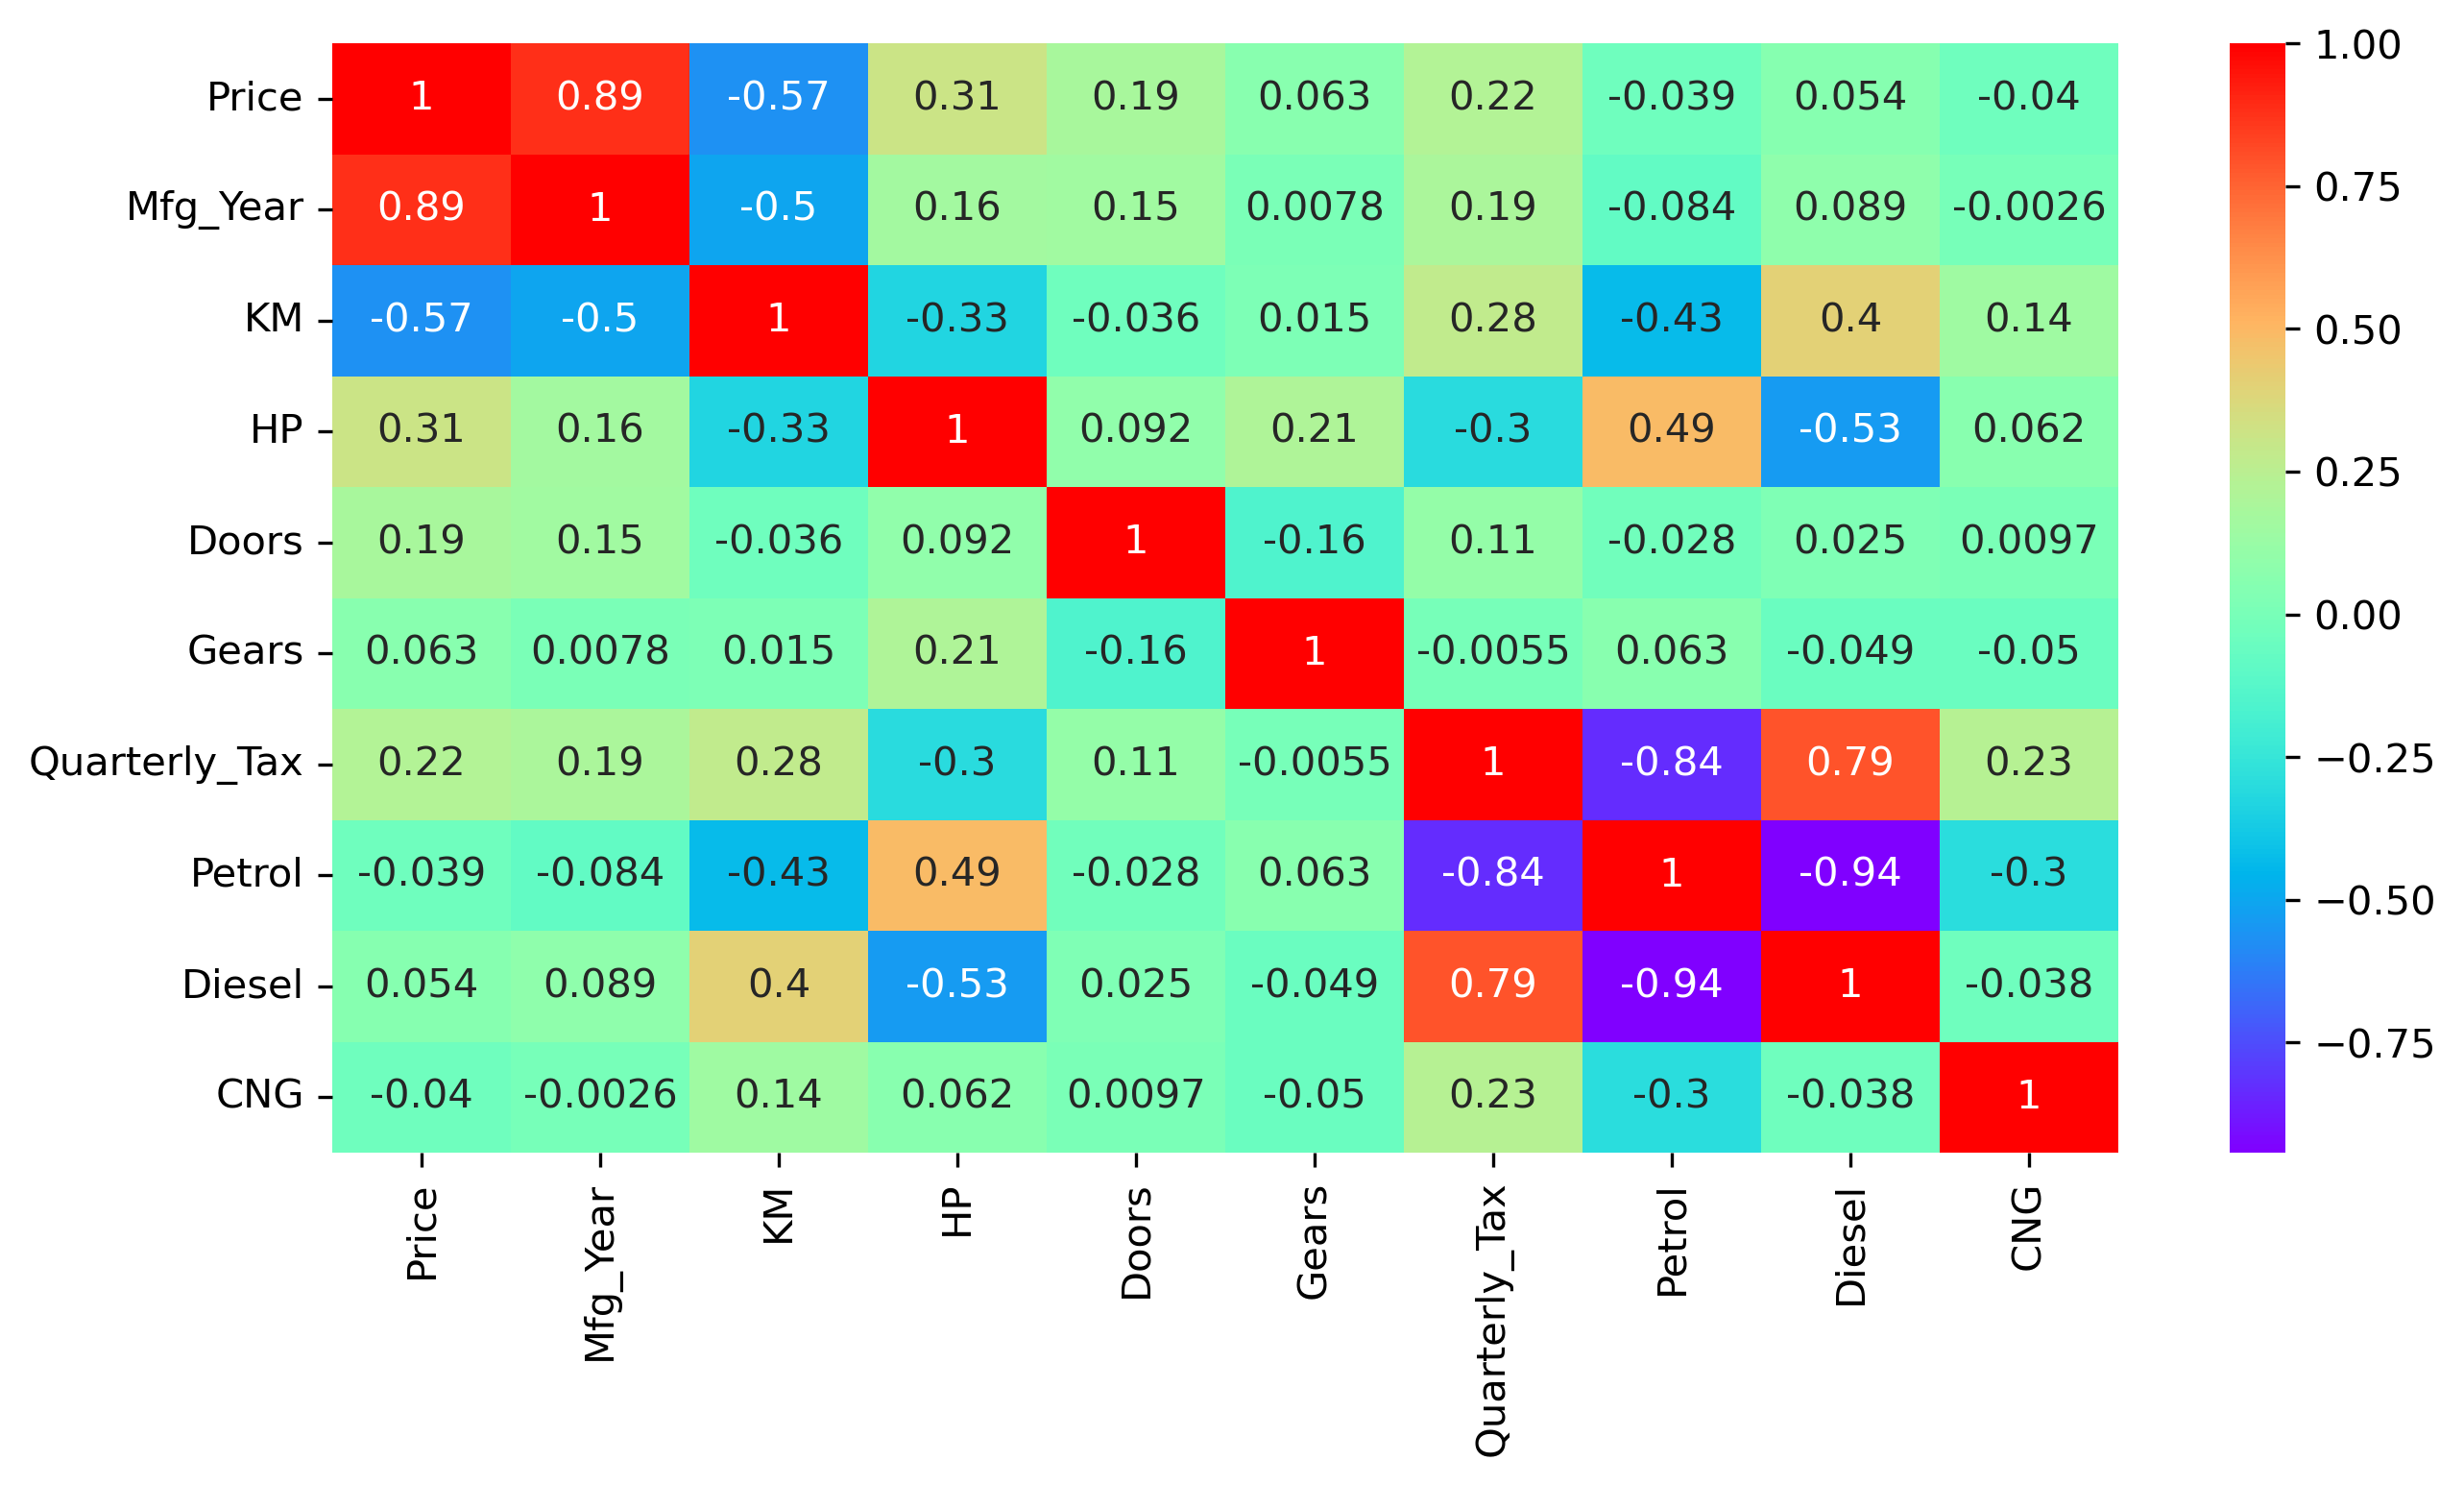

In [19]:
sns.heatmap(df1.corr(), annot=True,cmap='rainbow')

In [20]:
print(df1.head())
df1.shape

   Price  Mfg_Year     KM  HP  Doors  Gears  Quarterly_Tax  Petrol  Diesel  \
0  13500      2002  46986  90      3      5            210       0       1   
1  13750      2002  72937  90      3      5            210       0       1   
2  13950      2002  41711  90      3      5            210       0       1   
3  14950      2002  48000  90      3      5            210       0       1   
4  13750      2002  38500  90      3      5            210       0       1   

   CNG  
0    0  
1    0  
2    0  
3    0  
4    0  


(1436, 10)

In [21]:
x = df1.iloc[:,1:].values
print(x.shape)
x

(1436, 9)


array([[ 2002, 46986,    90, ...,     0,     1,     0],
       [ 2002, 72937,    90, ...,     0,     1,     0],
       [ 2002, 41711,    90, ...,     0,     1,     0],
       ...,
       [ 1998, 17016,    86, ...,     1,     0,     0],
       [ 1998, 16916,    86, ...,     1,     0,     0],
       [ 1998,     1,   110, ...,     1,     0,     0]], dtype=int64)

In [22]:
y = df1.iloc[:,[0]].values
print(y.shape)
y

(1436, 1)


array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)

In [23]:
#Split data into Training and Testing


from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.7, random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lg = LinearRegression()
lg.fit(xtrain,ytrain)

LinearRegression()

In [27]:
#Predict

ypred = lg.predict(xtest)
ypred

array([[11483.57003172],
       [11616.47337071],
       [14126.18293026],
       [ 6093.4502919 ],
       [13321.97637734],
       [16804.95157473],
       [ 7228.06728666],
       [10098.52982829],
       [ 7405.38691292],
       [12899.26000444],
       [10107.98942384],
       [ 9946.2880433 ],
       [ 8105.21246838],
       [ 9703.21787981],
       [ 6630.03595415],
       [ 8768.33133144],
       [ 5680.62169038],
       [ 7243.39393946],
       [17050.08160037],
       [ 5037.01119776],
       [15398.62045357],
       [ 6446.53304482],
       [ 8393.73116507],
       [ 6204.45179261],
       [13803.17103266],
       [18891.39440268],
       [ 8433.16276153],
       [11318.01470515],
       [16360.76379718],
       [11245.25551966],
       [ 7700.37003635],
       [ 7563.13272722],
       [13463.7697725 ],
       [17753.02781358],
       [23655.32534875],
       [10651.12200231],
       [11470.41782547],
       [ 7897.42537623],
       [ 8893.67263599],
       [17051.35138666],


In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(ytest,ypred)

0.8580737445934699